In [1]:
# Importing few libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds

# Load the dataset
dataset, info = tfds.load('eurosat', split='train', as_supervised=True, with_info=True)

# Check dataset info
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/incomplete.KZTSUT_2.0.0/eurosat-train.tfrecord*...:   0%|     …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir=PosixGPath('/tmp/tmp2zrezoantfds'),
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(

In [ ]:
pip install rasterio

In [7]:
# Essential and common packages

import os
import glob

# Read and visualize the raster data
import rasterio
from rasterio.plot import show

# Plots and bars
import matplotlib.pyplot as plt
import seaborn as sns

# Computation library
import numpy as np

# Tensorflow for building the resnet50 model
import tensorflow.python.keras as k
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.models import Model

# Sklearn for confusion matrix
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# For visualization of plots without plt.show()
%matplotlib inline

In [8]:
import tensorflow_datasets as tfds

# Load the EuroSAT dataset
dataset, info = tfds.load('eurosat', with_info=True)

# Access the training split
train_dataset = dataset['train']

# Display dataset information
print(info)


tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='/root/tensorflow_datasets/eurosat/rgb/2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Define parameters
img_height, img_width = 64, 64  # EuroSAT images are 64x64
batch_size = 32
validation_split = 0.2  # 20% validation split
rescale = 1.0 / 255  # Normalize pixel values

# Load the EuroSAT dataset using TFDS
dataset, info = tfds.load("eurosat", as_supervised=True, with_info=True, split=["train[:80%]", "train[80%:]"])

# Split dataset into training and validation sets
train_dataset, val_dataset = dataset

# Apply normalization using a TensorFlow preprocessing layer
normalization_layer = tf.keras.layers.Rescaling(rescale)

# Apply transformations
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y)).batch(batch_size).shuffle(1000)
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y)).batch(batch_size)



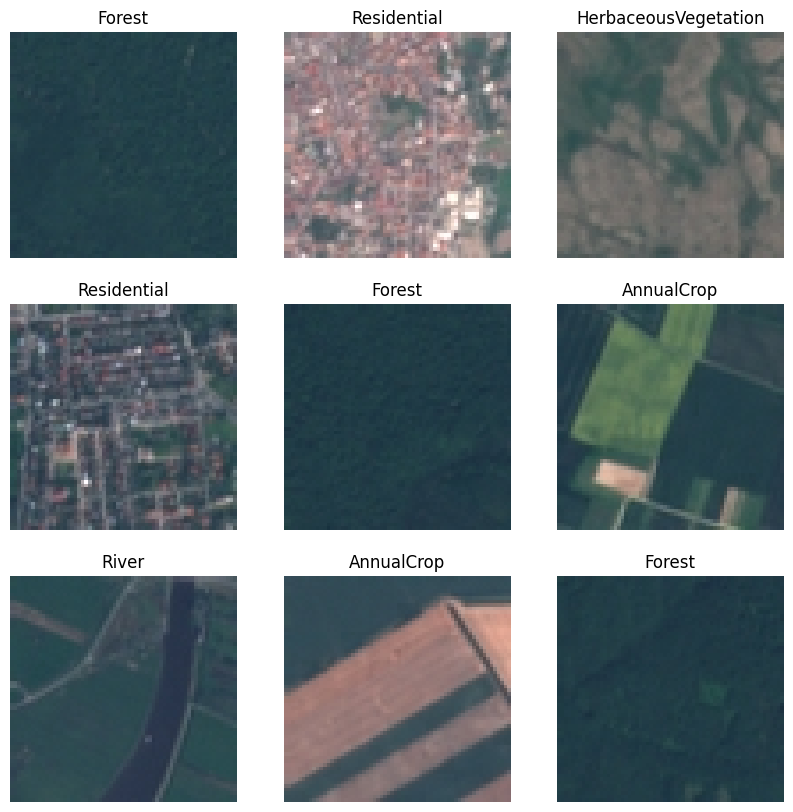

In [10]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the EuroSAT dataset
dataset, info = tfds.load("eurosat", as_supervised=True, with_info=True, split="train")

# Get class names
class_names = info.features["label"].names

# Take a batch of images (fix for InvalidArgumentError)
dataset = dataset.batch(9).take(1)  # Batch size 9 for display
for images, labels in dataset:
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert to uint8 for display
        plt.title(class_names[labels[i].numpy()])  # Get class name
        plt.axis("off")

plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.initializers import HeNormal

def identity_block_v2(X, f, filters, training=True, initializer=HeNormal):
    """
    Identity block implementation for ResNet-50v2

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- list of 3 integers, defining the number of filters in the CONV layers
    training -- True: Training mode, False: Inference mode
    initializer -- He Normal initializer for weights

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    F1, F2, F3 = filters
    X_shortcut = X  # Save the shortcut for later addition

    # First component (BatchNorm -> ReLU -> Conv)
    X = BatchNormalization(axis=3)(X, training=training)
    X = Activation('relu')(X)
    X = Conv2D(filters=F1, kernel_size=1, strides=(1, 1), padding='valid',
               kernel_initializer=initializer(seed=0))(X)

    # Second component (BatchNorm -> ReLU -> Conv)
    X = BatchNormalization(axis=3)(X, training=training)
    X = Activation('relu')(X)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same',
               kernel_initializer=initializer(seed=0))(X)

    # Third component (BatchNorm -> ReLU -> Conv)
    X = BatchNormalization(axis=3)(X, training=training)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=1, strides=(1, 1), padding='valid',
               kernel_initializer=initializer(seed=0))(X)

    # Add shortcut and return
    X = Add()([X, X_shortcut])
    return X


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.initializers import HeNormal

def convolutional_block_v2(X, f, filters, s=2, training=True, initializer=HeNormal):
    """
    Convolutional block implementation for ResNet-50v2

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- list of 3 integers, defining the number of filters in the CONV layers
    s -- Integer, specifying the stride for the first convolution
    training -- True: Training mode, False: Inference mode
    initializer -- He Normal initializer for weights

    Returns:
    X -- output tensor of shape (n_H, n_W, n_C)
    """
    F1, F2, F3 = filters
    X_shortcut = X  # Save input for the shortcut path

    # First component (BatchNorm -> ReLU -> Conv)
    X = BatchNormalization(axis=3)(X, training=training)
    X = Activation('relu')(X)
    X = Conv2D(filters=F1, kernel_size=1, strides=(s, s), padding='valid',
               kernel_initializer=initializer(seed=0))(X)

    # Second component (BatchNorm -> ReLU -> Conv)
    X = BatchNormalization(axis=3)(X, training=training)
    X = Activation('relu')(X)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same',
               kernel_initializer=initializer(seed=0))(X)

    # Third component (BatchNorm -> ReLU -> Conv)
    X = BatchNormalization(axis=3)(X, training=training)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=1, strides=(1, 1), padding='valid',
               kernel_initializer=initializer(seed=0))(X)

    # Shortcut path (Conv -> BatchNorm)
    X_shortcut = Conv2D(filters=F3, kernel_size=1, strides=(s, s), padding='valid',
                        kernel_initializer=initializer(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut, training=training)

    # Add shortcut and return
    X = Add()([X, X_shortcut])
    return X


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, Activation,
                                     ZeroPadding2D, MaxPooling2D, AveragePooling2D,
                                     Flatten, Dense)
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.models import Model

def ResNet50V2(input_shape=(64, 64, 3), classes=6):
    """
    ResNet-50v2 architecture implementation
    """
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)

    # Initial Convolution & MaxPooling
    X = Conv2D(64, (7, 7), strides=(2, 2), padding="valid", kernel_initializer=HeNormal(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2), padding="same")(X)

    # Stage 1
    X = convolutional_block_v2(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block_v2(X, 3, [64, 64, 256])
    X = identity_block_v2(X, 3, [64, 64, 256])

    # Stage 2
    X = convolutional_block_v2(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block_v2(X, 3, [128, 128, 512])
    X = identity_block_v2(X, 3, [128, 128, 512])
    X = identity_block_v2(X, 3, [128, 128, 512])

    # Stage 3
    X = convolutional_block_v2(X, f=3, filters=[256, 256, 1024], s=2)
    for _ in range(5):
        X = identity_block_v2(X, 3, [256, 256, 1024])

    # Stage 4
    X = convolutional_block_v2(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block_v2(X, 3, [512, 512, 2048])
    X = identity_block_v2(X, 3, [512, 512, 2048])

    # Final Layers
    X = BatchNormalization(axis=3)(X)  # One last BatchNorm before pooling
    X = Activation("relu")(X)
    X = AveragePooling2D(pool_size=(2, 2), name='avg_pool')(X)

    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer=HeNormal(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name="ResNet50V2")
    return model


In [14]:
model = ResNet50V2(input_shape=(64,64,3), classes=10)

In [16]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import mixed_precision

# Enable mixed precision for faster computation
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Add early stopping and model checkpointing to save best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
checkpoint = ModelCheckpoint("model_checkpoint.h5", save_best_only=True)

# Optimized data pipeline
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping, checkpoint])


In [ ]:
model.save('lulc_20_epoch')

In [18]:
# Ensure model is trained and history is defined
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=20,
                    callbacks=[checkpoint_callback])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.53, 11.69))

# Plot accuracy over epochs
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy over Epochs')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot loss over epochs
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Loss over Epochs')
ax2.legend(['Train', 'Test'], loc="upper right")

# Show the plot
plt.show()


In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for i, (image_batch, label_batch) in enumerate(test_dataset):   # use dataset.unbatch() with repeat
    # append true labels
    y_true.append(label_batch)
    # compute predictions
    preds = model.predict(image_batch)
    # append predicted labels
    y_pred.append(np.argmax(preds, axis =  1))
    if i==300:
        break

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
correct_labels = np.argmax(correct_labels, axis=1)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
cm = confusion_matrix(correct_labels, predicted_labels)
cm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion Matrix', figsize=(10, 10), cmap=plt.cm.Blues):
    """
    This function computes, prints, and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    Arguments:
    y_true -- True labels
    y_pred -- Predicted labels
    classes -- List of class names
    normalize -- Whether to normalize values
    title -- Title of the confusion matrix
    figsize -- Size of the figure
    cmap -- Color map
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}" if normalize else cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
# Get predictions
y_pred_probs = model.predict(test_dataset)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)    # Convert to class labels

# Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)  # Extract true labels
y_true = np.argmax(y_true, axis=1)  # Convert one-hot encoding to labels if needed

# Class names
class_names = ["Class1", "Class2", "Class3", "Class4", "Class5", "Class6"]  # Modify as per dataset

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True)

In [ ]:
plot_confusion_matrix(cm, train_dataset.class_indices, cmap='Reds')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(r"lulc")